# ChatGPT-3 v Humans

Performing lexical-semantical analysis of chatGPT-3 and humans

In [ ]:
# all imports 
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import unicodedata

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# read dataset
df = pd.read_csv('/content/drive/MyDrive/ChatGPTvHumans/cgpt_v_humans_dataset_test.csv')
df.head()

,Questions,Text,Class
0,can you tell me what the difference is between...,Left-wing politics typically involves support ...,chatgpt3
1,can you tell me what the difference is between...,Left wing politics often focuses on social equ...,human
2,What are some must-read books on economics?,There are many sub-fields in Economics so it r...,human
3,What are some must-read books on economics?,Here are a few must-read books on economics th...,chatgpt3
4,What is the main reason why people start a bus...,Money. While most that have started a business...,human


In [ ]:
# drop questions
df_text = df.drop('Questions', axis=1)
df_text.head(10)

,Text,Class
0,Left-wing politics typically involves support ...,chatgpt3
1,Left wing politics often focuses on social equ...,human
2,There are many sub-fields in Economics so it r...,human
3,Here are a few must-read books on economics th...,chatgpt3
4,Money. While most that have started a business...,human
5,The main reason people start a business is to ...,chatgpt3


In [ ]:
# change datatype to string
df_text['Text'] = df_text['Text'].fillna('').astype(str)
print(df_text.dtypes)

Text     object
Class    object
dtype: object


# with Stop Word Removal

In [ ]:
# new DataFrame for no Stop Word (noSW)
df_noSW = df_text

In [ ]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words("english")

def remove_stopwords(text):
  filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# tested, works
df_noSW["Text"] = df_noSW.Text.map(remove_stopwords)
df_noSW.head(10)

,Text,Class
0,left-wing politics typically involves support ...,chatgpt3
1,left wing politics often focuses social equali...,human
2,many sub-fields economics really depends keen ...,human
3,must-read books economics considered classics ...,chatgpt3
4,money. started business say make world better ...,human
5,main reason people start business make profit ...,chatgpt3


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(''.join(str(df_noSW['Text'].tolist())))

In [ ]:
unigram = (pd.Series(nltk.ngrams(words, 1)).value_counts())
bigram = (pd.Series(nltk.ngrams(words, 2)).value_counts())
trigram = (pd.Series(nltk.ngrams(words, 3)).value_counts())

In [ ]:
print(unigram, bigram, trigram)

(economics,)     12
(politics,)       8
(business,)       7
(social,)         6
(published,)      5
                 ..
(irrational,)     1
(dan,)            1
(ariely,)         1
(delve,)          1
(pursuing,)       1
Length: 317, dtype: int64 (wing, politics)              3
(leftwing, politics)          2
(government, intervention)    2
(century, thomas)             2
(income, wealth)              2
                             ..
(logic, life)                 1
(try, logic)                  1
(could, try)                  1
(behavior, could)             1
(passion, interest)           1
Length: 429, dtype: int64 (also, tend, supportive)               2
(left, wing, politics)                 2
(century, thomas, piketty)             2
(thaler, ca, sunstein)                 2
(richard, thaler, ca)                  2
                                      ..
(economist, study, human)              1
(mainstream, economist, study)         1
(understand, mainstream, economist)    1
(wish, 

In [ ]:
# create series of top 10 of n-gram
unigrams_series = unigram[:10]
bigrams_series = bigram[:10]
trigrams_series = trigram[:10]

## Visualization (after cleaning)

Text(0.5, 0, '# of Occurances')

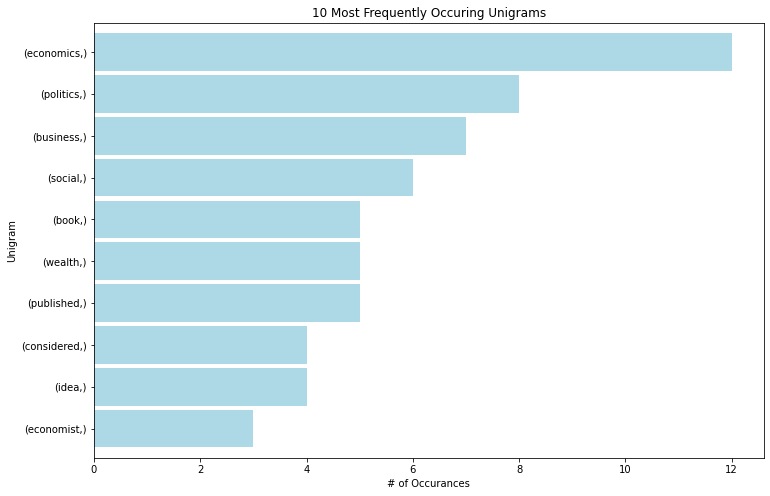

In [ ]:
unigrams_series.sort_values().plot.barh(color='lightblue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

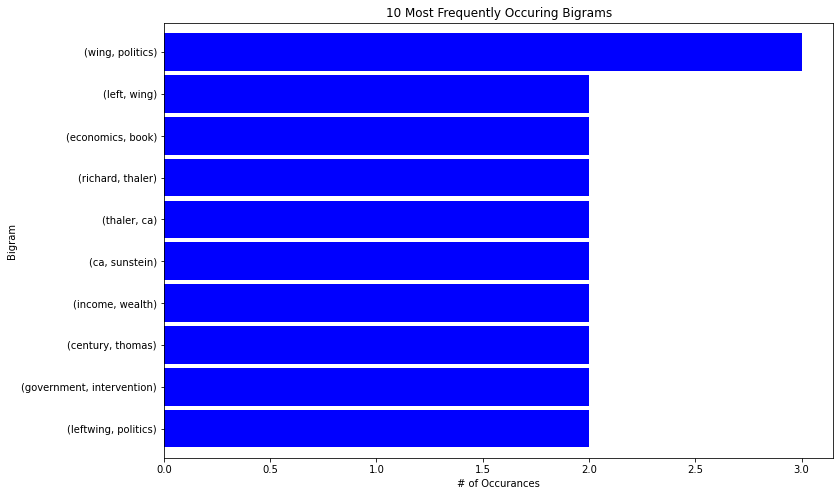

In [ ]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

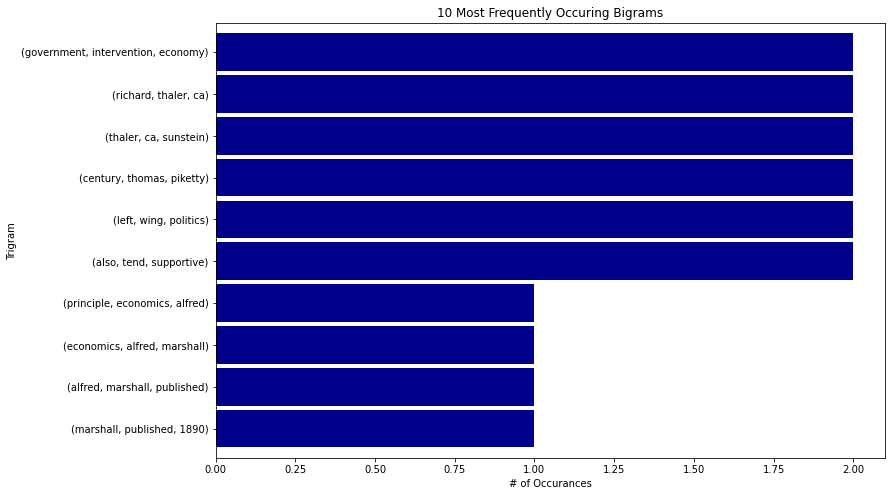

In [ ]:
trigrams_series.sort_values().plot.barh(color='darkblue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
words

['leftwing',
 'politics',
 'typically',
 'involves',
 'support',
 'policy',
 'prioritize',
 'need',
 'welfare',
 'marginalized',
 'oppressed',
 'group',
 'worker',
 'minority',
 'poor',
 'leftwing',
 'ideology',
 'often',
 'advocate',
 'greater',
 'government',
 'intervention',
 'economy',
 'progressive',
 'taxation',
 'social',
 'program',
 'ensure',
 'equal',
 'distribution',
 'wealth',
 'opportunity',
 'also',
 'tend',
 'supportive',
 'environmental',
 'protection',
 'civil',
 'liberty',
 'international',
 'cooperation',
 'rightwing',
 'politics',
 'hand',
 'generally',
 'prioritizes',
 'need',
 'interest',
 'traditional',
 'societal',
 'economic',
 'elite',
 'business',
 'owner',
 'wealthy',
 'rightwing',
 'ideology',
 'tend',
 'advocate',
 'limited',
 'government',
 'intervention',
 'economy',
 'lower',
 'tax',
 'smaller',
 'social',
 'program',
 'also',
 'tend',
 'supportive',
 'strong',
 'national',
 'defense',
 'law',
 'order',
 'traditional',
 'social',
 'value',
 'summary',
 

In [ ]:
from nltk.util import ngrams

n = 1
sentence = 'You You face many defeats in life, but never let yourself be defeated.'
unigrams = ngrams(sentence.split(), n)

for item in unigrams:
    print(item)

('You',)
('You',)
('face',)
('many',)
('defeats',)
('in',)
('life,',)
('but',)
('never',)
('let',)
('yourself',)
('be',)
('defeated.',)
